<a href="https://colab.research.google.com/github/HoPhuocMinhQuan20104052/HoPhuocMinhQuan/blob/main/Flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_data = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_set = train_data.flow_from_directory('/content/drive/MyDrive/Flower',target_size=(150,150), batch_size=32, class_mode='categorical')


Found 2501 images belonging to 3 classes.


In [ ]:
test_set = train_data.flow_from_directory('/content/drive/MyDrive/Flower',target_size=(150,150), batch_size=32, class_mode='categorical')


Found 2501 images belonging to 3 classes.


In [ ]:
train_set.class_indices
test_set.class_indices

{'rose': 0, 'sunflower': 1, 'tulip': 2}

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_set,epochs=10,batch_size=128,verbose=1, validation_data=test_set, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/10
79/79 [==============================] - 465s 6s/step - loss: 1.5299 - accuracy: 0.5426 - val_loss: 0.7362 - val_accuracy: 0.6813
Epoch 2/10
79/79 [==============================] - 51s 649ms/step - loss: 0.7397 - accuracy: 0.6653 - val_loss: 0.6445 - val_accuracy: 0.7125
Epoch 3/10
79/79 [==============================] - 41s 521ms/step - loss: 0.6903 - accuracy: 0.6801 - val_loss: 0.6360 - val_accuracy: 0.7201
Epoch 4/10
79/79 [==============================] - 43s 551ms/step - loss: 0.6452 - accuracy: 0.7125 - val_loss: 0.6180 - val_accuracy: 0.7245
Epoch 5/10
79/79 [==============================] - 41s 523ms/step - loss: 0.6450 - accuracy: 0.7113 - val_loss: 0.5756 - val_accuracy: 0.7565
Epoch 6/10
79/79 [==============================] - 42s 535ms/step - loss: 0.5953 - accuracy: 0.7365 - val_loss: 0.5320 - val_accuracy: 0.7681
Epoch 7/10
79/79 [==============================] - 41s 519ms/step - loss: 0.5499 - accuracy: 0.7613 - val_loss: 0.5351 - val_accuracy: 0.7641
E

In [ ]:
model.save('Nhandienhoa.h5')


In [ ]:
model_flower = load_model('Nhandienhoa.h5')


1/1 [==============================] - 0s 16ms/step
This is: sunflower


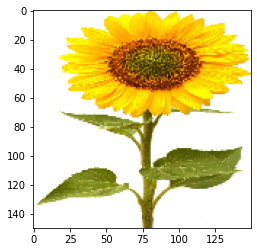

In [ ]:
img = load_img('/content/hoahuongduong.png',target_size = (150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_flower.predict(img)
class_name=['rose','sunflower','tulip']
a= int(np.argmax(result,axis=1))
print("This is:", class_name[a])